In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import SpatialDropout1D
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/indonesian-news-title.csv')
train.head()

,date,url,title,category
0,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance
1,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance
2,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,02/26/2020,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91017 entries, 0 to 91016
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      91017 non-null  object
 1   url       91017 non-null  object
 2   title     91017 non-null  object
 3   category  91017 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


In [ ]:
train.size

364068

In [ ]:
train = train[['title','category']]
train.head()

,title,category
0,Kemnaker Awasi TKA di Meikarta,finance
1,BNI Digitalkan BNI Java Jazz 2020,finance
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance


In [ ]:
# Preprocessing teks
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(train['title'])
X = tokenizer.texts_to_sequences(train['title'])
X = pad_sequences(X, maxlen=50)  # Sesuaikan panjang sequence

# Convert labels to categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['category_encoded'] = label_encoder.fit_transform(train['category'])
y = to_categorical(train['category_encoded'])

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build model Simple RNN
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=50))
model.add(SpatialDropout1D(0.2))
model.add(SimpleRNN(120, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 61s 50ms/step - accuracy: 0.4136 - loss: 1.7032 - val_accuracy: 0.7311 - val_loss: 0.8139
Epoch 2/5
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 83s 51ms/step - accuracy: 0.7316 - loss: 0.8187 - val_accuracy: 0.7942 - val_loss: 0.6442
Epoch 3/5
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.7876 - loss: 0.6553 - val_accuracy: 0.8071 - val_loss: 0.6096
Epoch 4/5
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.8129 - loss: 0.5813 - val_accuracy: 0.8093 - val_loss: 0.6049
Epoch 5/5
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 85s 49ms/step - accuracy: 0.8174 - loss: 0.5653 - val_accuracy: 0.8042 - val_loss: 0.6183


In [ ]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

569/569 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8060 - loss: 0.6151
Test Accuracy: 0.804163932800293


In [ ]:
test_titles = [
    "Presiden Indonesia mengunjungi proyek infrastruktur baru",
    "Tim sepak bola Indonesia berhasil memenangkan pertandingan",
    "Harga minyak dunia melonjak karena krisis global",
    "Film baru ini mendapatkan review positif dari kritikus",
    "Kebijakan ekonomi baru diresmikan oleh pemerintah",
    "Maskapai penerbangan menawarkan diskon besar-besaran untuk liburan",
    "Teknologi baru ini akan mengubah cara kita berinteraksi dengan dunia digital",
    "Perusahaan otomotif meluncurkan mobil listrik terbaru dengan fitur canggih",
    "Ahli kesehatan memberikan tips menjaga daya tahan tubuh di musim hujan",
    "Restoran ini menawarkan hidangan lezat dengan bahan-bahan lokal",
    "Tim bulu tangkis Indonesia sukses meraih medali emas di kejuaraan dunia",
    "Perubahan iklim mempengaruhi pola cuaca dan pertanian di seluruh dunia",
    "Startup lokal mendapatkan pendanaan untuk proyek pengembangan teknologi ramah lingkungan",
    "Bursa saham mengalami penurunan tajam akibat ketidakpastian ekonomi global",
    "Turnamen tenis bergengsi akan diselenggarakan di kota besar bulan depan"
]


In [ ]:
true_labels = ['news', 'sport', 'finance', 'hot', 'news', 'travel', 'inet', 'oto', 'health', 'food', 'sport', 'news', 'finance', 'finance', 'sport']

In [ ]:
# Preprocess data test
test_sequences = tokenizer.texts_to_sequences(test_titles)
test_padded = pad_sequences(test_sequences, maxlen=50)

# Prediksi kategori
predictions = model.predict(test_padded)

# Mendapatkan kategori hasil prediksi
predicted_categories = label_encoder.inverse_transform(predictions.argmax(axis=1))

# Tampilkan hasil prediksi
for i, title in enumerate(test_titles):
    print(f"Judul: {title}")
    print(f"Kategori yang Diprediksi: {predicted_categories[i]}")
    print("-" * 50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Judul: Presiden Indonesia mengunjungi proyek infrastruktur baru
Kategori yang Diprediksi: finance
--------------------------------------------------
Judul: Tim sepak bola Indonesia berhasil memenangkan pertandingan
Kategori yang Diprediksi: oto
--------------------------------------------------
Judul: Harga minyak dunia melonjak karena krisis global
Kategori yang Diprediksi: finance
--------------------------------------------------
Judul: Film baru ini mendapatkan review positif dari kritikus
Kategori yang Diprediksi: food
--------------------------------------------------
Judul: Kebijakan ekonomi baru diresmikan oleh pemerintah
Kategori yang Diprediksi: finance
--------------------------------------------------
Judul: Maskapai penerbangan menawarkan diskon besar-besaran untuk liburan
Kategori yang Diprediksi: travel
--------------------------------------------------
Judul: Teknologi baru ini akan mengubah cara kita berinteraksi dengan dunia digi

In [ ]:
predicted_categories = label_encoder.inverse_transform(predictions.argmax(axis=1))
accuracy = accuracy_score(true_labels, predicted_categories)

print(f"Akurasi pada data test: {accuracy * 100:.2f}%")

Akurasi pada data test: 66.67%


Epoch 1/5
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 56s 49ms/step - accuracy: 0.8259 - loss: 0.5371 - val_accuracy: 0.8153 - val_loss: 0.5919
Epoch 2/5
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.8397 - loss: 0.4957 - val_accuracy: 0.8078 - val_loss: 0.6034
Epoch 3/5
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 56s 49ms/step - accuracy: 0.8422 - loss: 0.4829 - val_accuracy: 0.8136 - val_loss: 0.5901
Epoch 4/5
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - accuracy: 0.8529 - loss: 0.4599 - val_accuracy: 0.8092 - val_loss: 0.6145
Epoch 5/5
1138/1138 ━━━━━━━━━━━━━━━━━━━━ 92s 54ms/step - accuracy: 0.8525 - loss: 0.4517 - val_accuracy: 0.8170 - val_loss: 0.5988


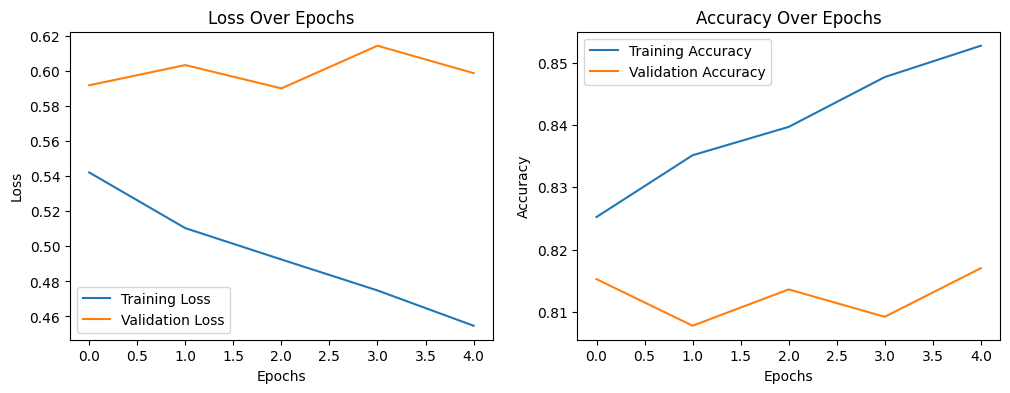

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))
# Plotting Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/model_rnn.keras')

In [ ]:
from tensorflow.keras.models import load_model

# Memuat model dari file
loaded_model = load_model('model_rnn.keras')

# Verifikasi bahwa model yang dimuat memiliki performa yang sama
loss, accuracy = loaded_model.evaluate(X_test, y_test)
print(f'Model loaded with accuracy: {accuracy:.2f}')


ValueError: File not found: filepath=model_rnn.keras. Please ensure the file is an accessible `.keras` zip file.